In [5]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [6]:
df = pd.read_csv('data/03_test_scores.csv')
df

,name,math,cs
0,david,92,98
1,laura,56,68
2,sanjay,88,81
3,wei,70,80
4,jeff,80,83
5,aamir,49,52
6,venkat,65,66
7,virat,35,30
8,arthur,66,68
9,paul,67,73


**Function**

$y = mx + b$

"x" is the 'math' column.<br>
"y" is the 'cs' column.

The goal is to find coef "m" and intercept "b".

### Gradient Descent method

**Derivatives**

- $\frac{d}{dm} = \frac{2}{n} \sum_{i=1}^{n}-x_i(y_i-(mx_i+b))$
- $\frac{d}{db} = \frac{2}{n} \sum_{i=1}^{n}-(y_i-(mx_i+b))$

**m and b**

- $m = m - learning\_rate * \frac{d}{dm}$
- $b = b - learning\_rate * \frac{d}{db}$

**Cost function:**

- $mse = \frac{1}{n} \sum_{i=1}^{n}(y_i-y_{predicted})^2$

In [7]:
def gradient_descent(x, y):
    plt.scatter(x, y, color='red', marker='+')
    plt.show()

    m_curr = 0
    b_curr = 0
    n = len(x)
    iterations = 400000
    learning_rate = 0.00021
    cost_previous = 0

    for i in range(iterations):
        y_predicted = m_curr * x + b_curr
        cost = (1 / n) * sum([val ** 2 for val in (y - y_predicted)])

        if math.isclose(cost, cost_previous, rel_tol=1e-20):
            # print(f"Iterations: {i+1}")
            break
        # plt.plot(x, y_predicted, color='blue')

        # derivatives d/dm and d/db
        md = -(2 / n) * sum(x * (y - y_predicted))
        bd = -(2 / n) * sum(y - y_predicted)
    
        # m and b
        m_curr = m_curr - learning_rate * md
        b_curr = b_curr - learning_rate * bd
        
        # print("m {}, b {}, cost {}, iteration {}".format(m_curr, b_curr, cost, i))
        cost_previous = cost
    
    return m_curr, b_curr

### Linear Regression method

In [8]:
def linear_regression():
    lin_reg = LinearRegression()
    lin_reg.fit(df[['math']], df['cs'])
    return lin_reg.coef_, lin_reg.intercept_

### Comparing methods

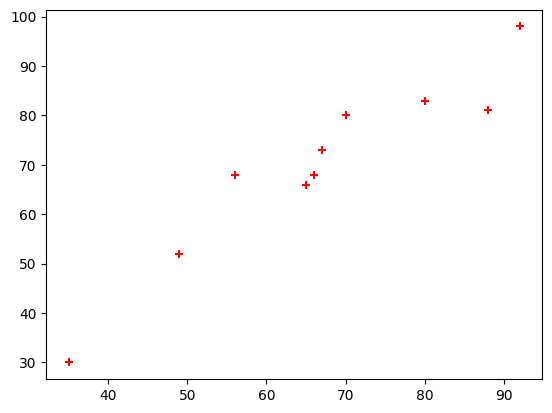

Gradient Descent
Coef m: 1.0177384103778218
Intercept b: 1.9150653502407735
Linear Regression
Coef m: [1.01773624]
Intercept b: 1.9152193111569318


In [9]:
results_math = np.array(df['math'])
results_cs = np.array(df['cs'])

# result of gradient descent method
m1, b1 = gradient_descent(results_math, results_cs)
print("Gradient Descent\nCoef m: {}\nIntercept b: {}".format(m1, b1))

# result of linear regression method
m2, b2 = linear_regression()
print("Linear Regression\nCoef m: {}\nIntercept b: {}".format(m2, b2))